EDA for Heart Attack Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Print the first 5 rows

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable


In [2]:
data = pd.read_csv("./heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Number of unique values in each column

In [3]:
data.shape

(303, 14)

In [4]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Age, Trtbps, chol, thalchh, and old peak are continuous categories

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Type of Chest Pain vs Output

cp
0    27.272727
1    82.000000
2    79.310345
3    69.565217
Name: output, dtype: float64


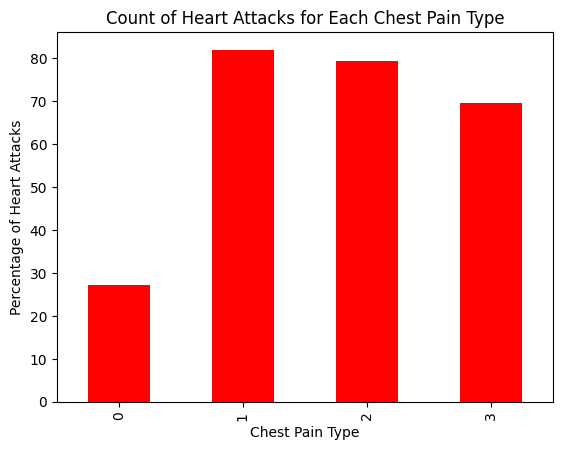

In [6]:
chest_pain_counts = data.groupby('cp')['output'].mean()*100
print(chest_pain_counts)
chest_pain_counts.plot(kind='bar', color='red')
plt.xlabel('Chest Pain Type')
plt.ylabel('Percentage of Heart Attacks')
plt.title('Count of Heart Attacks for Each Chest Pain Type')
plt.show()

Chest Pain types 1 and 2 had higher percentage of high HA chances

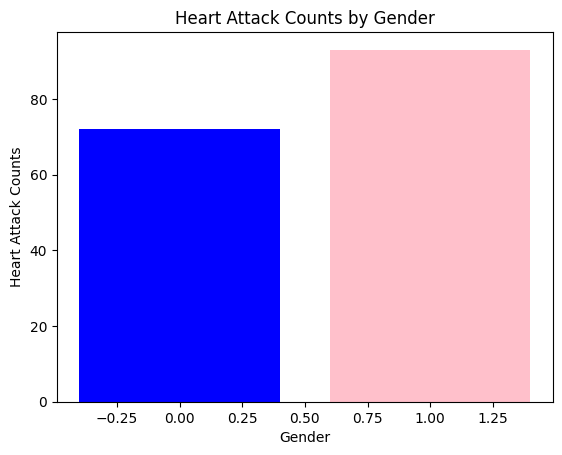

In [7]:
male_data = data[data['sex'] == 0]
female_data = data[data['sex'] == 1]

female_heart_attacks = female_data['output'].sum()
male_heart_attacks = male_data['output'].sum()

plt.bar([0,1], [male_heart_attacks,female_heart_attacks],color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Heart Attack Counts')
plt.title('Heart Attack Counts by Gender')
plt.show()

In this dataset, sex 0 had less higher chances of HA than sex 1

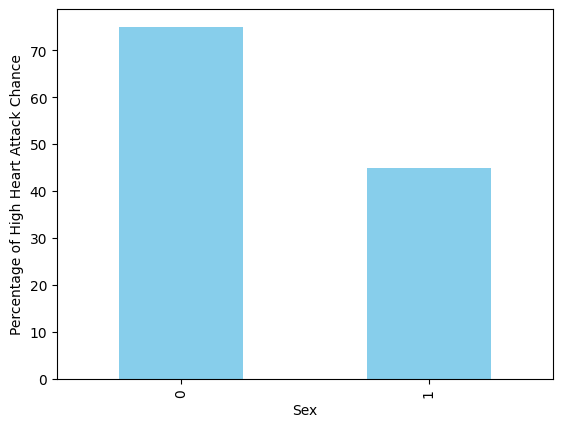

In [8]:
sex_percentage = data.groupby('sex')['output'].mean()*100
sex_percentage.plot(kind='bar', color='skyblue')
plt.xlabel("Sex")
plt.ylabel("Percentage of High Heart Attack Chance")
plt.show()

Sex 0 had a higher percentage of high HA than Sex 1

<Axes: xlabel='exng'>

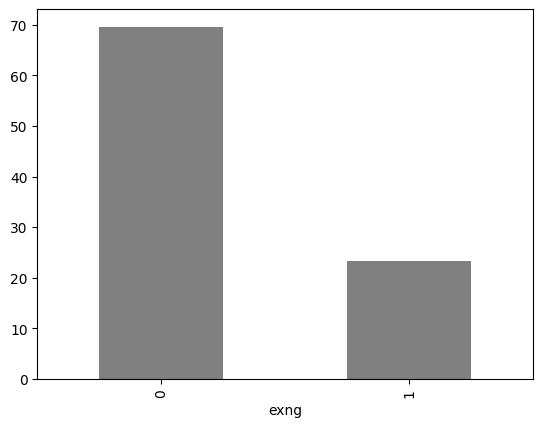

In [9]:
workout = data.groupby('exng')["output"].mean()*100
workout.plot(kind='bar', color='gray')

People with no excercise indiced angina have a sign higher chance of HA

SVM Preliminary Model

In [10]:
def get_top_correlated_features(data, output_column, n=5):
    # Calculate the correlation matrix
    corr_matrix = data.corr()
    
    # Sort the correlation values with respect to the output column
    corr_with_output = corr_matrix[output_column].abs().sort_values(ascending=False)
    
    # Get the top N correlated features (excluding the output column itself)
    top_features = corr_with_output.drop(output_column).head(n)
    
    return top_features

In [11]:
import shap
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ModuleNotFoundError: No module named 'shap'

In [ ]:
print(get_top_correlated_features(data, 'output', 5))

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
Name: output, dtype: float64


In [ ]:
def model(input_column):
    selected_columns = [input_column, 'output']
    train_data = data[selected_columns]

    #Split data into features and target variable
    X = train_data.drop('output', axis=1)
    y = train_data['output']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Initalize model
    svm_model = SVC(kernel='linear')
    #Train Model
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(input_column)
    print(f'accuracy_score: {accuracy}')

    print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

    explainer = shap.Explainer(svm_model, X_train)
    shap_values = explainer.shap_values(X_test)

    # Visualize the SHAP values for the input column
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
    shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))



exng
accuracy_score: 0.7049180327868853
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.59      0.65        29
           1       0.68      0.81      0.74        32

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



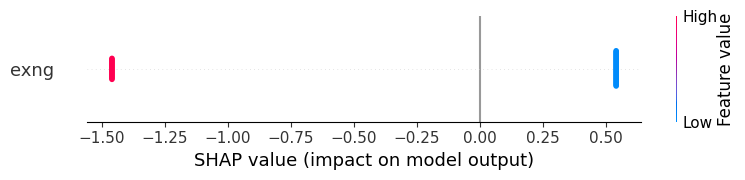

cp
accuracy_score: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



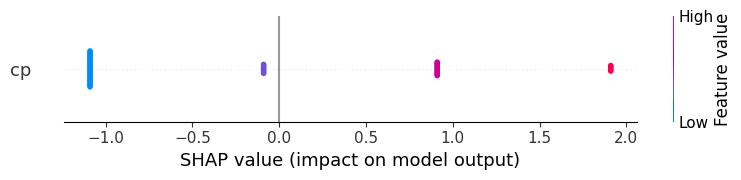

oldpeak
accuracy_score: 0.6885245901639344
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.59      0.64        29
           1       0.68      0.78      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61



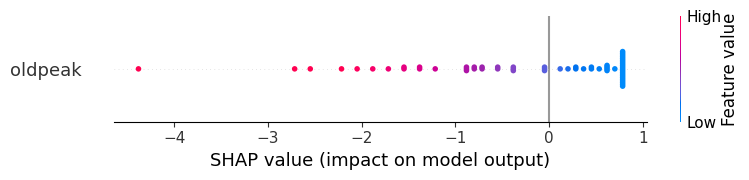

thalachh
accuracy_score: 0.7213114754098361
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67        29
           1       0.69      0.84      0.76        32

    accuracy                           0.72        61
   macro avg       0.73      0.71      0.71        61
weighted avg       0.73      0.72      0.72        61



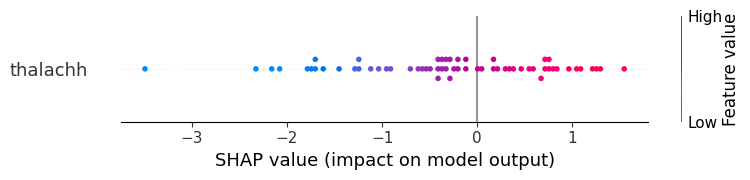

caa
accuracy_score: 0.7213114754098361
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.52      0.64        29
           1       0.67      0.91      0.77        32

    accuracy                           0.72        61
   macro avg       0.75      0.71      0.71        61
weighted avg       0.75      0.72      0.71        61



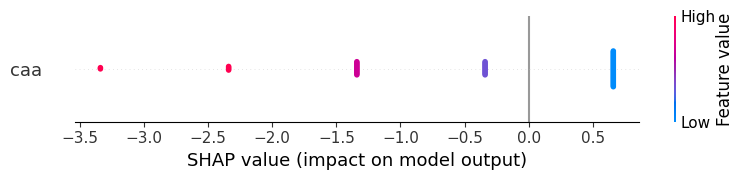

In [ ]:
model('exng')
model('cp')
model('oldpeak')
model('thalachh')
model('caa')
